# Part (b): Introduction to Data Analytics
### UE22CS342AA2 - Data Analytics 
- Karthik Namboori - namkarthik2003@gmail.com


The assignment has the below problems:
- Problem 1
- Problem 2
- Problem 3
- Problem 4
- Problem 5
- Problem 6

*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```
*Load a package*

```
library(tidyverse)
```


In [66]:
library(ggplot2)

# About The Dataset
The below is a sample dataset on the customer satisfaction based on experience from a purchased product.

- CustomerID - Unique identifier of each customer.
- Age: Customers age.
- Gender of the customer.
- Satisfaction Score: On a scale from 1 to 10.
- Purchase Frequency.
- Feedback by the customer.

*Problem 1*

In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. In the customer satisfaction dataset, can you classify the columns with missing data into different categories? (MCAR, MNAR or MAR) (1 point)



In [67]:
# loading the dataset - Upload the dataset under the input tab
# Example snippet
data <- read.csv("/kaggle/input/customer-satisfaction/customer_satisfaction.csv")
data

CustomerID,Age,Gender,SatisfactionScore,PurchaseFrequency,Feedback
<int>,<int>,<chr>,<int>,<int>,<chr>
101,34,M,8,5,Great Product
102,28,F,8,NA,Good service
103,33,M,2,1,
104,45,F,7,5,Excellent
105,30,M,6,NA,Good
106,35,F,1,NA,
107,40,M,3,1,Poor


In [68]:
print("PurchaseFrequency column = MCAR category. The values of purchaseFrequency are missing completely at random and it is not related to any of the observed data (i.e age, gender etc).")
print("Feedback column = MAR category. The values of Feedback are related to the observed value 'SatisfactionScore'. Feedback is missing for tuples who's satisfaction score is low")

[1] "PurchaseFrequency column = MCAR category. The values of purchaseFrequency are missing completely at random and it is not related to any of the observed data (i.e age, gender etc)."
[1] "Feedback column = MAR category. The values of Feedback are related to the observed value 'SatisfactionScore'. Feedback is missing for tuples who's satisfaction score is low"


# About the dataset

- The below dataset constitute the results of a chemical analysis on wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
- It has been taken from [here](https://archive.ics.uci.edu/dataset/109/wine).

*Features*
- Alcohol: Percentage of alcohol in the wine (vol. %).
- Malic Acid: Concentration of malic acid (g/dm³).
- Ash: Ash content (g/dm³).
- Alcalinity of Ash: Alcalinity of ash (in terms of NaOH) (g/dm³).
- Magnesium: Magnesium content (mg/dm³).
- Total Phenols: Total phenol content (g/dm³).
- Flavanoids: Flavanoid content (g/dm³).
- Nonflavanoid Phenols: Non-flavanoid phenol content (g/dm³).
- Proanthocyanins: Proanthocyanin content (g/dm³).
- Color Intensity: Color intensity of the wine (arbitrary units).
- Hue: Hue of the wine (arbitrary units).
- OD280/OD315 of Diluted Wines: Ratio of optical densities at 280 nm and 315 nm (arbitrary units).
- Proline: Proline content (mg/dm³).

*`Quality`*:
The target class of the alcohol


*Problem 2*

The mean values of the columns `Flavanoids` and `Total_phenols` in the wine dataset are 2.03 and 2.29, respectively. Although these means are nearby, does this imply that the distributions of these two variables are practically equivalent?

To answer this, create a histogram and overlay the probability density curve for each of the 2 variables. Discuss your findings, particularly focusing on the shape and spread of the distributions. Do add a note on the peaks of the histogram. (2 points)



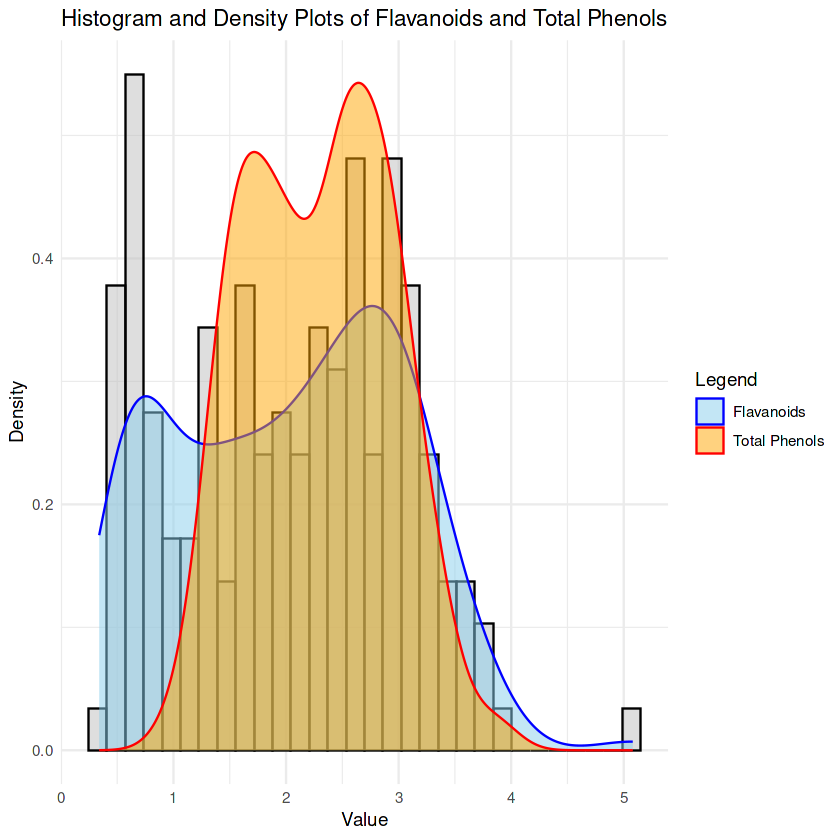

In [69]:

library(ggplot2)
data <- read.csv("/kaggle/input/wine-quality/wine_quality_combined.csv")

ggplot(data) +
  geom_histogram(aes(x = Flavanoids, y = ..density..), bins = 30, fill = "gray", color = "black", alpha = 0.5) +
  geom_density(aes(x = Flavanoids, color = "Flavanoids"), fill = "skyblue", alpha = 0.5) +
  geom_density(aes(x = Total_phenols, color = "Total Phenols"), fill = "orange", alpha = 0.5) +
  labs(title = "Histogram and Density Plots of Flavanoids and Total Phenols",
       x = "Value",
       y = "Density") +
  scale_color_manual(name = "Legend", values = c("Flavanoids" = "blue", "Total Phenols" = "red")) +
  theme_minimal()





*Problem 3*

For the different types of quality of alcohol, compare the distributions of its color intensity. Add a note on the outliers and skewness of each category. You can make use of the box plot. (1 + 1 points)



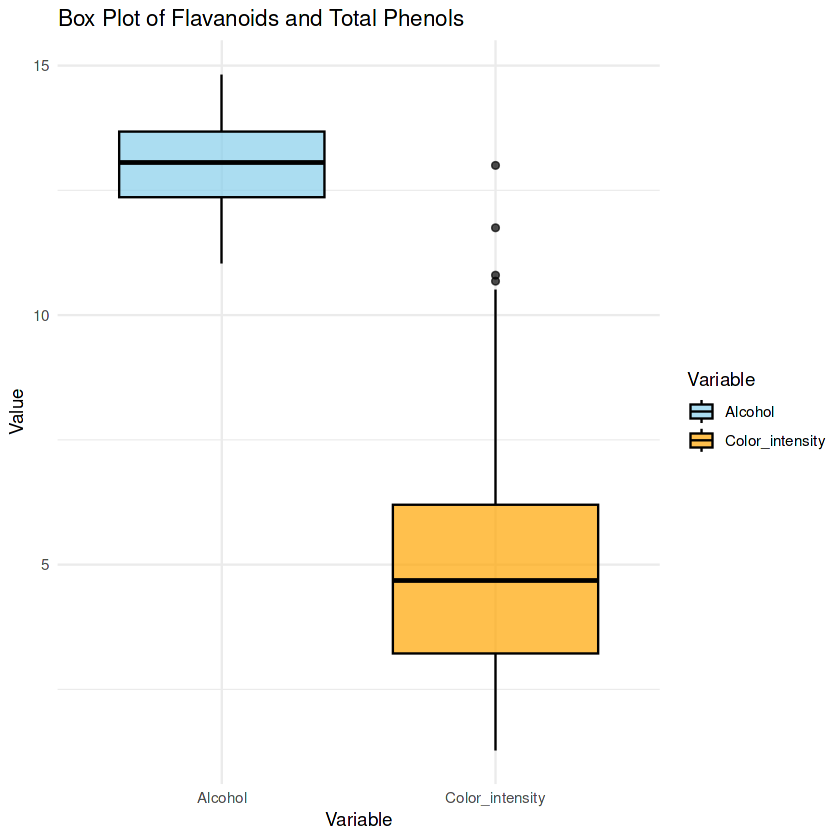

In [70]:
library(tidyr)

data_long <- pivot_longer(data, cols = c(Alcohol, Color_intensity), 
                          names_to = "Variable", values_to = "Value")

ggplot(data_long, aes(x = Variable, y = Value, fill = Variable)) +
  geom_boxplot(color = "black", alpha = 0.7) +
  labs(title = "Box Plot of Flavanoids and Total Phenols",
       x = "Variable",
       y = "Value") +
  scale_fill_manual(values = c("Alcohol" = "skyblue", "Color_intensity" = "orange")) +
  theme_minimal()


*Problem 4*

Explain Dimensionality Reduction. Perform PCA on the dataset and extract the proportion of variance explained by each principal component. How many principal components should be retained based on the `scree plot`? Examine the loadings of the first two principal components. Which variables contribute most to these components? (2 points)

**Hint**:
Scree Plot is a common method for determining the number of PCs to be retained through a graphical representation. A Scree Plot is a simple line segment plot that shows the eigenvalues for each individual PC. 

You can learn more about a scree plot [here](https://sanchitamangale12.medium.com/scree-plot-733ed72c8608)

**Hint**:
In PCA, the contribution of each feature to a principal component is called the `loading`. Loadings are compared with the absolute value



[1] "Based on the screeplot, the elbow point occurs at 4. So the first three principal components must be retained"


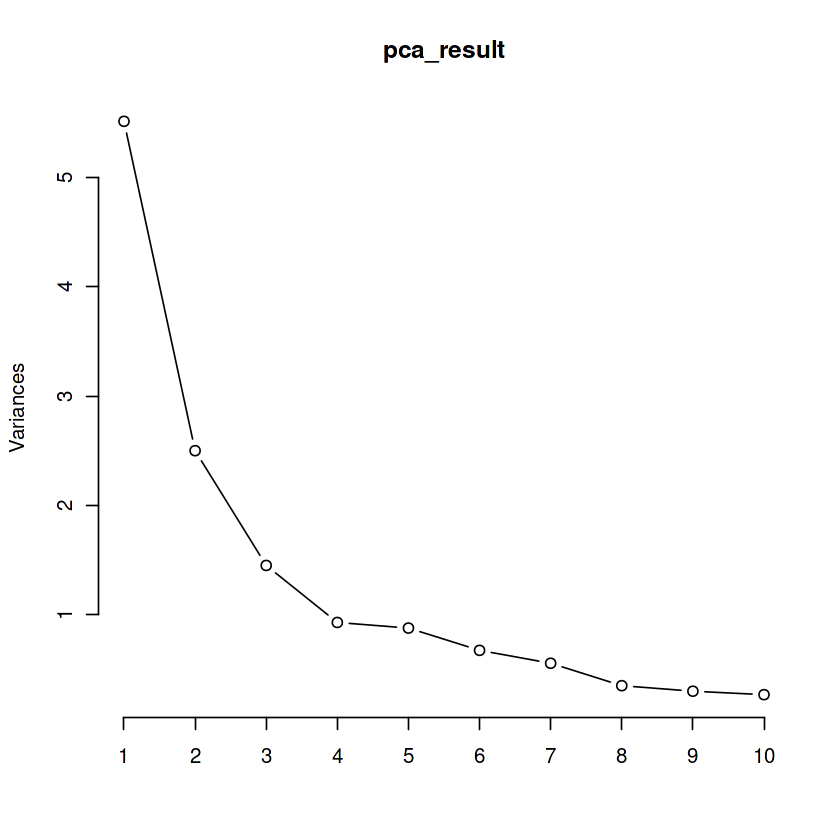

In [71]:
#Dimensionality Reduction is used to reduce the number of features we are taking into consideration without losing too much information.
# Load the data
library(tidyverse)
data <- read.csv("/kaggle/input/wine-quality/wine_quality_combined.csv")
data_scaled <- scale(data)
pca_result <- prcomp(data_scaled, center = TRUE, scale. = TRUE)
screeplot(pca_result, type = "lines")
print("Based on the screeplot, the elbow point occurs at 4. So the first three principal components must be retained")


In [59]:
pca_result

Standard deviations (1, .., p=14):
 [1] 2.3483219 1.5811662 1.2041110 0.9633461 0.9362538 0.8201625 0.7447098
 [8] 0.5911321 0.5465998 0.5168663 0.4757849 0.4156620 0.3619567 0.2408948

Rotation (n x k) = (14 x 14):
                                       PC1          PC2          PC3
Alcohol                       -0.136759348 -0.483815991 -0.203626475
Malicacid                      0.223517788 -0.223063419  0.091402912
Ash                           -0.002167986 -0.314558733  0.625412480
Alcalinity_of_ash              0.223881258  0.013920235  0.612885989
Magnesium                     -0.125282960 -0.299931209  0.131451034
Total_phenols                 -0.360147794 -0.066787531  0.146249443
Flavanoids                    -0.391426968  0.001303494  0.149718700
Nonflavanoid_phenols           0.267513383 -0.026576569  0.169622418
Proanthocyanins               -0.279504603 -0.041300575  0.148649313
Color_intensity                0.089582399 -0.529623586 -0.134293609
Hue                      

*Problem 5* 

Now, for the selected components, find the percentage contribution of each feature to each of the components. (Hint: First find the square of the loadings also known as the cos2 values - find percentage contribution using these values) (2 points)

In [72]:
pc_loadings <- pca_result$rotation[, 1:3]
squared_loadings <- pc_loadings^2
sum_squared_loadings <- colSums(squared_loadings)
percentage_contribution <- sweep(squared_loadings, 2, sum_squared_loadings, FUN = "/") * 100
percentage_contribution

,PC1,PC2,PC3
Alcohol,1.870312e+00,2.340779e+01,4.146374e+00
Malicacid,4.996020e+00,4.975729e+00,8.354492e-01
Ash,4.700164e-04,9.894720e+00,3.911408e+01
Alcalinity_of_ash,5.012282e+00,1.937729e-02,3.756292e+01
Magnesium,1.569582e+00,8.995873e+00,1.727937e+00
Total_phenols,1.297064e+01,4.460574e-01,2.138890e+00
Flavanoids,1.532151e+01,1.699097e-04,2.241569e+00
Nonflavanoid_phenols,7.156341e+00,7.063140e-02,2.877176e+00
Proanthocyanins,7.812282e+00,1.705737e-01,2.209662e+00
Color_intensity,8.025006e-01,2.805011e+01,1.803477e+00


*Problem 6*

Generate a plot using the `fviz_pca_var` function to visualize how well each feature is represented by the principal components in the PCA analysis. (Pay attention to the length of the arrows in the fviz_pca_var plot.) (1 point)

In [64]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



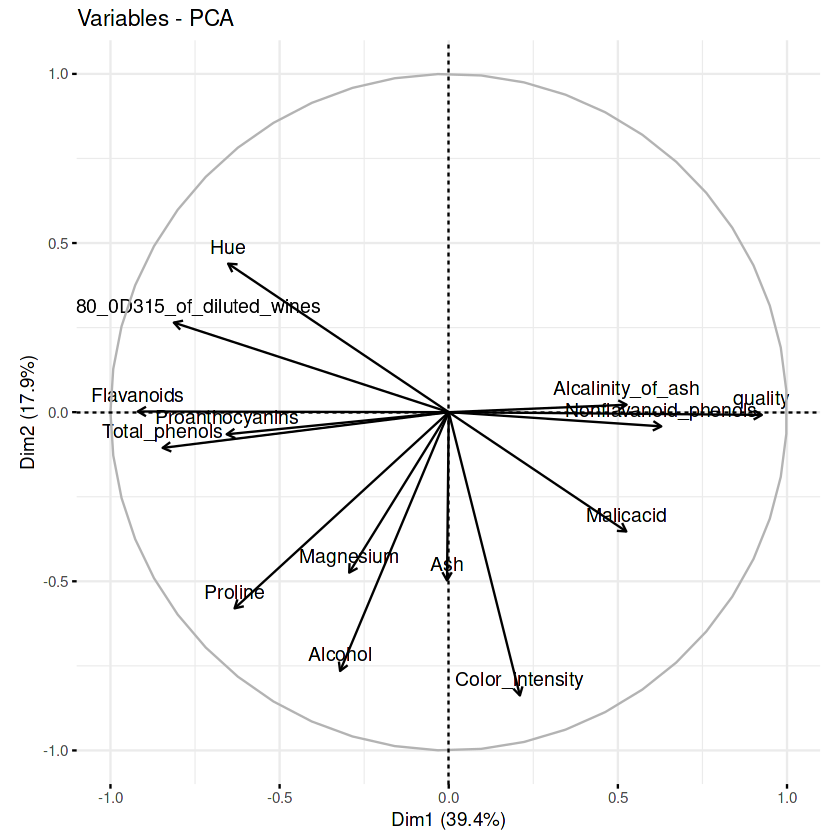

In [65]:
fviz_pca_var(pca_result)

PCA is performed at times when the dataset is large. The reduced set takes considerably smaller space and shorter time to train classifiers/ regression models with only making use of the most influential data.

*fin*